In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

**Read dataset**

In [2]:
data = pd.read_csv('datasets/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# I- Without Machine Learning Algorithms


Let's try to differentiate graphically the fraud cases

In [41]:
t_norm  = len(Y[Y==0])
t_fraud = len(Y[Y==1])
ratio = str(100 * t_fraud/len(data))[0:4]
print('Number of Transactions: %d'%len(data))
print('Number of Normal Transactions: %d'%t_norm)
print('Number of Fraud Transactions: %d'%t_fraud)

print('\nRatio of Fraud Transactions: %s'%ratio,'%')

Number of Transactions: 284807
Number of Normal Transactions: 284315
Number of Fraud Transactions: 492

Ratio of Fraud Transactions: 0.17 %


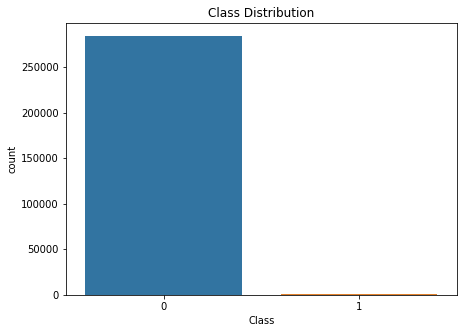

In [39]:
plt.figure(figsize=(7,5))
sns.countplot(x="Class", data=data)
plt.title('Class Distribution')
plt.show()

**Note:** We can see that the dataset is unbalanced. In fact the class 1 which represent fraud transactions account for 0.17% of all transactions.

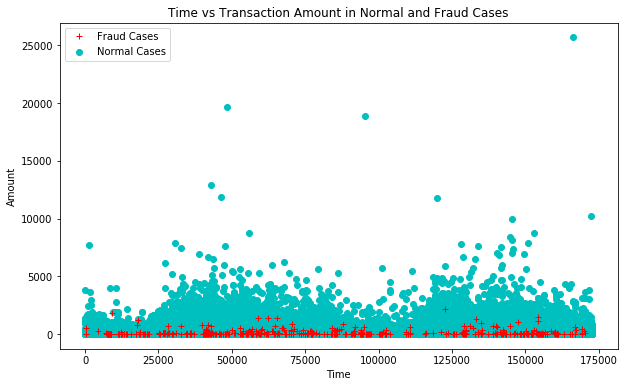

In [31]:
time = data[data['Class']==0]['Time']
amount = data[data['Class']==0]['Amount']

time_fraud = data[data['Class']==1]['Time']
amount_fraud = data[data['Class']==1]['Amount']

plt.figure(figsize=(10,6))
plt.scatter(time, amount, c='c', label='Normal Cases')
plt.plot(time_fraud,amount_fraud, 'r+', label='Fraud Cases')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Time vs Transaction Amount in Normal and Fraud Cases')
plt.legend()
plt.show()

# II- Local Outlier Factor Algorithm¶

In [3]:
X = data.drop("Class", axis=1)
Y = data['Class']

In [5]:
lof = LocalOutlierFactor(n_neighbors=10, algorithm='auto', metric='euclidean', contamination=0.0017)
y_pred = lof.fit_predict(X)

The LOF assigns the outliers the value -1 and 1 for normals.<br>

We transform the prediction by giving value 0 to normal points and 1 to outliers.

In [69]:
y_pred[y_pred== 1]=0
y_pred[y_pred== -1]=1

In [ ]:
print("Normal Cases Accuracy:", list(normals_pred_test).count(1)/len(normals_pred_test))
print("Fraud Cases Accuracy :", list(outliers_pred).count(-1)/len(outliers_pred))

In [70]:
n_erros = (y_pred !=Y).sum()
print('Number of  errors: {}'.format(n_erros))

print("Accuracy Score: {}".format(accuracy_score(Y,y_pred)))
print("Classification Report: \n {}".format(classification_report(Y,y_pred)))

Number of  errors: 492
Accuracy Score: 0.9982725143693799
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807



# III- Isolation Forest Algorithm

In [72]:
isfo = IsolationForest()
isfo_pred = isfo.fit_predict(X)

In [74]:
isfo_pred[isfo_pred== 1]=0
isfo_pred[isfo_pred== -1]=1

In [75]:
print("Accuracy Score: {}".format(accuracy_score(Y,isfo_pred)))
print("Classification Report: \n {}".format(classification_report(Y,isfo_pred)))

Accuracy Score: 0.9013402058235929
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95    284315
           1       0.02      0.89      0.03       492

    accuracy                           0.90    284807
   macro avg       0.51      0.89      0.49    284807
weighted avg       1.00      0.90      0.95    284807



**Note:** Recall represents the sensitivity: TP/TP+FN . On obtained a recall of 0.89 which is better well by comparing with the LOF algorithm.

# IV- Another way to compare between the two algorithms

### 1- Local Outlier Factor

In [11]:
normals = data[data.Class==0]
normals = normals.drop(['Class'],axis=1)
outliers = data[data.Class==1]
outliers = outliers.drop(['Class'],axis=1)

Let's begin by spliting the normals cases dataset

In [12]:
normal_train,normal_test = train_test_split(normals, test_size=0.30, random_state=42)

In [6]:
model = LocalOutlierFactor(novelty=True)
model.fit(normal_train)
normal_pred_test = model.predict(normal_test)
outlier_pred = model.predict(outliers)

In [8]:
print("Normal Cases Accuracy:", str(list(normal_pred_test).count(1)/len(normal_pred_test))[0:5])
print("Fraud Cases Accuracy :", str(list(outlier_pred).count(-1)/len(outlier_pred))[0:5])

Normal Cases Accuracy: 0.894
Fraud Cases Accuracy : 0.396


### 2- Isolation Forest

In [13]:
isfo = IsolationForest()
isfo = isfo.fit(normal_train)
normal_pred_test = isfo.predict(normal_test)
outlier_pred = isfo.predict(outliers)

In [14]:
print("Normal Cases Accuracy:", str(list(normal_pred_test).count(1)/len(normal_pred_test))[0:5])
print("Fraud Cases Accuracy :", str(list(outlier_pred).count(-1)/len(outlier_pred))[0:5])

Normal Cases Accuracy: 0.900
Fraud Cases Accuracy : 0.894
